# Find a Reachability map

## DATA 

### 1-3. **TCP(x,y,z)**
### 4-6. **eef(x,y,z)** 
### 7. **angle** = Cr (idx: 6)
### 8. **angle** = Pitch (idx: 7)
### 9. **angle** = Roll (idx: 8)
### 10. **manipulability** (idx: 9)
### 11. Joint 1
### 12. Joint 2
### 13. Joint 3
### 14. Joint 4 
### 15. Joint 5
### 16. Joint 6

> In this file, Cr is degrees.

1. Offline
    1. Configuration
        1. `M`: X-Y-Cr manipulability map
        2. `Rsize`: the size of the robot-base
    1. Preparation
        1. Convert the `M` to a feasibility map `F` (helical shape).
        2. ~~[SKIP] Convert a cartesian grid `F` to a cylindrical grid `F` by linear interpolation.~~
2. Online
    1. Input
        1. `Pt`: Position of the target object (relative to the robot’s current pose)
        2. `Obs`: Area list of ground obstacles
        3. `Cr`: Constraints on the approach angle (relative to the robot heading)
        4. `Ct`: Constraints on the approach angle (relative to the target heading)
    2. Process
        1. Cut the range of `Cr` from `F` and set it to `Fcut`.
        2. ~~[SKIP] Scan the maximum points for the radius and angle by each circle in `Fcut`.~~
        3. Wipe the `Fcut` in the range of `Ct`.
        4. And extract only the maximum as a `Fmax`.
        5. Remove all obstacle areas from `Fmax` with the offset of `Rsize`.
    3. Output
        1. Candidate poses (sorted in descending order of manipulability)


In [1]:
%matplotlib inline
# %matplotlib qt

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
AbbMData = np.load('poserectification.npy')
print(AbbMData.shape)

IndyMData = np.load('indyrobot_manip_2021-04-17_22-52-34allz.npy')
print(IndyMData.shape)

(9772, 16)
(10710, 16)


In [3]:
def scatter_2d(ax, theta, xs, ys, manip, col, dot_size=4, arrow_size=1):
    colors = np.array([(col[0], col[1], col[2], m) for m in manip])
    ax.scatter(xs, ys, c=colors, s=dot_size)
    ax.set_xlabel('x(cm)', fontsize=15)
    ax.set_ylabel('y(cm)', fontsize=15)
    ax.grid(True)
    # robot and object
    arrow_x = np.array([0.7, 0.6, 0.6, 0.7, 0.7]) * arrow_size
    arrow_y = np.array([0.05, 0.05, -0.05, -0.05, 0.05]) * arrow_size
    ax.plot(arrow_x, arrow_y,'g')
    
    arrow_x = np.array([-0.7, -0.6, -0.6, -0.7, -0.7]) * arrow_size
    arrow_y = np.array([0.05, 0.05, -0.05, -0.05, 0.05]) * arrow_size
    ax.plot(arrow_x, arrow_y,'g')

def manipulability(ax, man, dot_size=4, arrow_size=1):
#     ax.plot(man[0],man[1] ,'.r')
#     ax.plot(man[16],man[17] ,'.b')
    ax.plot(man[0],man[1] ,'.g',markersize=15)
    
    ax.set_xlabel('x(cm)', fontsize=15)
    ax.set_ylabel('y(cm)', fontsize=15)
    ax.grid(True)
    # robot and object
    arrow_x = np.array([0.7, 0.6, 0.6, 0.7, 0.7]) * arrow_size
    arrow_y = np.array([0.05, 0.05, -0.05, -0.05, 0.05]) * arrow_size
    ax.plot(arrow_x, arrow_y,'g')
    
    arrow_x = np.array([-0.7, -0.6, -0.6, -0.7, -0.7]) * arrow_size
    arrow_y = np.array([0.05, 0.05, -0.05, -0.05, 0.05]) * arrow_size
    ax.plot(arrow_x, arrow_y,'g')
    
def scatter_3d(ax, theta, xs, ys, manip):
    colors = np.array([(1.0-m, m, 0.0, m) for m in manip])
    ax.scatter(xs, ys, zs=theta, c=colors)
    ax.set_xlabel('x(cm)', fontsize=15)
    ax.set_ylabel('y(cm)', fontsize=15)
    ax.set_zlabel('$\Theta$(deg)', fontsize=15)
    ax.set_title('Manipulability Map')
    
def scatter_3dm(ax, theta, xs, ys, manip, col):
    colors = np.array([(col[0], col[1], col[2], m) for m in manip])
    ax.scatter(xs, ys, zs=theta, c=colors)
    ax.plot([xs[1]],[ys[1]],[theta[1]],'.g',markersize=30)
    ax.set_xlabel('x(mm)', fontsize=15)
    ax.set_ylabel('y(mm)', fontsize=15)
    ax.set_zlabel('z(mm)', fontsize=15)
    ax.set_title('Manipulability Map')


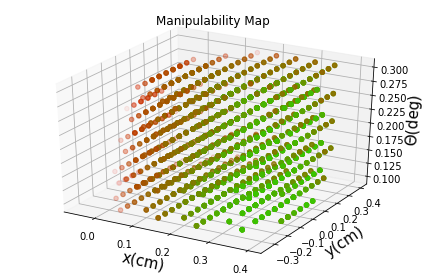

In [4]:
Fig3D = plt.figure()
ax = Fig3D.add_subplot(111, projection='3d')

scatter_3d(ax, AbbMData[:, 2], AbbMData[:, 0], AbbMData[:, 1], AbbMData[:, 9]*8)
Fig3D.tight_layout()
plt.show()

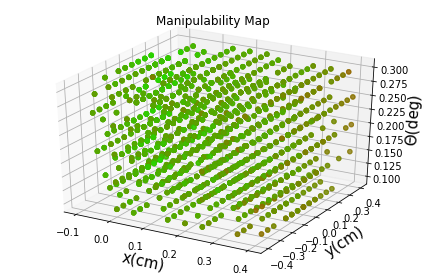

In [5]:
Fig3D= plt.figure()
ax2 = Fig3D.add_subplot(111, projection='3d')
scatter_3d(ax2, IndyMData[:, 2], IndyMData[:, 0], IndyMData[:, 1], IndyMData[:, 9]*7)
Fig3D.tight_layout()
plt.show()

In [6]:
# fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
# scatter_2d(ax1, 0, AbbMData['TCPx'], AbbMData['TCPy'], AbbMData['M'])
# scatter_2d(ax2, 0, IndyMData['TCPx'], IndyMData['TCPy'], IndyMData['M'])

# xyminmax = [-0.8, 0.8, -0.3, 0.3]
# ax1.axis(xyminmax)
# ax2.axis(xyminmax)
# fig.tight_layout()
# plt.show()

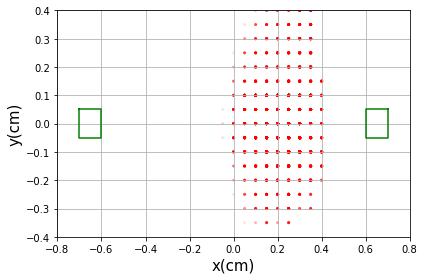

In [7]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1)
# scatter_2d(ax1, 0, AbbMData['eefx'], AbbMData['eefy'], AbbMData['M'])
scatter_2d(ax1, 0, AbbMData[:, 0], AbbMData[:, 1], AbbMData[:, 9], col=[1,0,0])

xyminmax = [-0.8, 0.8, -0.4, 0.4]
ax1.axis(xyminmax)
ax2.axis(xyminmax)
fig.tight_layout()
plt.show()

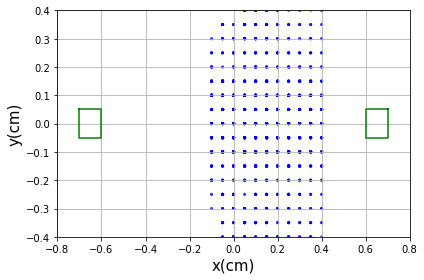

In [8]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1)
# scatter_2d(ax1, 0, IndyMData['eefx'], IndyMData['eefy'], IndyMData['M'])
scatter_2d(ax1, 0, IndyMData[:, 0], IndyMData[:, 1], IndyMData[:, 9], col=[0,0,1])

xyminmax = [-0.8, 0.8, -0.4, 0.4]
ax1.axis(xyminmax)
fig.tight_layout()
plt.show()

# map only with 0 direction

In [9]:
# Abb = AbbMData[(AbbMData[:, 6] == -90)|(AbbMData[:, 6] == 90) |(AbbMData[:, 6] == 45)|(AbbMData[:, 6] == -45) |(AbbMData[:, 6] == 0), :]
Abb = AbbMData
print(Abb.shape)
Indy = IndyMData
print(Indy.shape)

(9772, 16)
(10710, 16)


# Reorganized with manipulability High

In [10]:
# Sort 2D numpy array by manipulability Column
ABBmdes = Abb[Abb[:,9].argsort()]
ABBzero = np.flip(ABBmdes, 0)
print(ABBzero.shape)

Indymdes = Indy[Indy[:,9].argsort()]
Indyzero = np.flip(Indymdes, 0)
print(Indyzero.shape)
# print(ABBzero[:,0])
# print(Indyzero[:,0])

(9772, 16)
(10710, 16)


In [11]:
ABBm=[]
for p in ABBzero:
    for q in Indyzero:
        if ((p[0]==q[0]) & (p[1]==q[1]) & (p[2]==q[2]) & (p[6]==q[6]) & (p[7]==q[7]) & (p[8]==q[8])):
            ABBm.append(p)
npraw = np.array(ABBm)

print(npraw.shape)

(12940, 16)


In [12]:
resultado = np.unique(npraw, axis=0)
print(resultado.shape)

(6600, 16)


In [13]:
_, index = np.unique(resultado[:, [0,1,2,6,7,8,9]], axis=0, return_index=True)
resultado=resultado[index]
resultado = resultado[resultado[:,9].argsort()]
resultado = np.flip(resultado, 0)
print(resultado.shape)
# print(resultado[:,0])

(3705, 16)


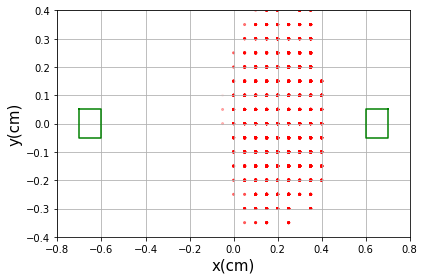

In [14]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1)
scatter_2d(ax1, 0, resultado[:, 0], resultado[:, 1], resultado[:, 9]*8, col=[1,0,0])

xyminmax = [-0.8, 0.8, -0.4, 0.4]
ax1.axis(xyminmax)
ax2.axis(xyminmax)
fig.tight_layout()
plt.show()

In [15]:
Indym=[]
for p in Indyzero:
    for q in ABBzero:
        if ((p[0]==q[0]) & (p[1]==q[1]) & (p[2]==q[2]) & (p[6]==q[6]) & (p[7]==q[7]) & (p[8]==q[8])):
            Indym.append(p)
#             
npraw1 = np.array(Indym)
print(npraw1.shape)
# print(npraw1[:,9])

(12940, 16)


In [16]:
resultado1 = np.unique(npraw1, axis=0)

In [17]:
_, index = np.unique(resultado1[:, [0,1,2,6,7,8]], axis=0, return_index=True)
resultado1=resultado1[index]
resultado1 = resultado1[resultado1[:,9].argsort()]
resultado1 = np.flip(resultado1, 0)
print(resultado1.shape)
# print(resultado1[:,9])

(3623, 16)


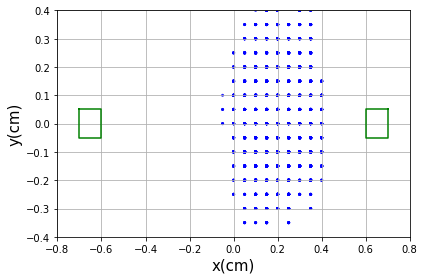

In [18]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1)
# scatter_2d(ax1, 0, IndyMData['eefx'], IndyMData['eefy'], IndyMData['M'])
scatter_2d(ax1, 0, resultado1[:, 0], resultado1[:, 1], resultado1[:, 9]*7, col=[0,0,1])

xyminmax = [-0.8, 0.8, -0.4, 0.4]
ax1.axis(xyminmax)
ax2.axis(xyminmax)
fig.tight_layout()
plt.show()


In [19]:
ABBmanipulability=[]
for p in range(len(resultado[:, 0])):
    for q in range(len(resultado1[:, 0])):
        if ((resultado[p,0]==resultado1[q,0]) & (resultado[p,1]==resultado1[q,1]) & (resultado[p,2]==resultado1[q,2]) & (resultado[p,6]==resultado1[q,6]) & (resultado[p,7]==resultado1[q,7]) & (resultado[p,8]==resultado1[q,8])):
            a = np.r_[resultado[p,:], resultado1[q,:],resultado[p,9]+resultado1[q,9]]
            ABBmanipulability.append(a)
            
npraw = np.array(ABBmanipulability)

print(npraw.shape)

(3705, 33)


In [20]:
dualmani = npraw[npraw[:,32].argsort()]
dualmani = np.flip(dualmani, 0)

# dualmani[:,32]

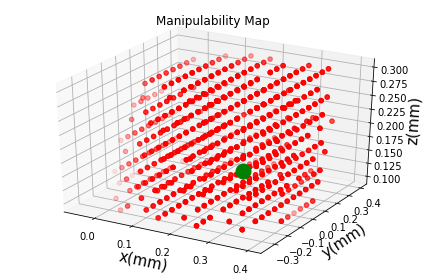

In [21]:
Fig3D = plt.figure()
ax = Fig3D.add_subplot(111, projection='3d')

scatter_3dm(ax, dualmani[:, 2], dualmani[:, 0], dualmani[:, 1], dualmani[:, 9]*7,col=[1,0,0])
Fig3D.tight_layout()
plt.show()

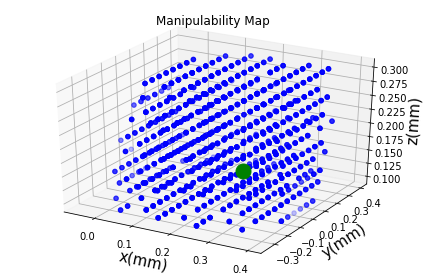

In [22]:
Fig3D = plt.figure()
ax = Fig3D.add_subplot(111, projection='3d')

scatter_3dm(ax, dualmani[:, 18], dualmani[:, 16], dualmani[:, 17], dualmani[:, 25]*7, col=[0,0,1] )
Fig3D.tight_layout()
plt.show()

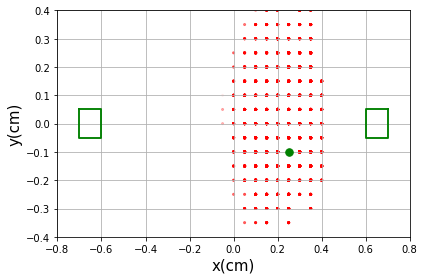

In [23]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1)
scatter_2d(ax1, 0, dualmani[:, 0], dualmani[:, 1], dualmani[:, 9]*8, col=[1,0,0])
manipulability(ax1, dualmani[0])
xyminmax = [-0.8, 0.8, -0.4, 0.4]
ax1.axis(xyminmax)
ax2.axis(xyminmax)
fig.tight_layout()
plt.show()

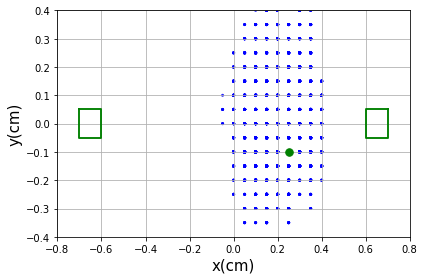

In [24]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1)
scatter_2d(ax1, 0, dualmani[:, 16], dualmani[:, 17], dualmani[:, 25]*7, col=[0,0,1] )
manipulability(ax1, dualmani[0])
xyminmax = [-0.8, 0.8, -0.4, 0.4]
ax1.axis(xyminmax)
ax2.axis(xyminmax)
fig.tight_layout()
plt.show()

In [25]:
#abb
dualmani[0,10:16]

array([4.67957847e-01, 1.31391000e-01, 6.02237645e-01, 6.29703752e-04,
       8.36352136e-01, 9.91505765e-01])

In [26]:
# indy
dualmani[0,26:32]

array([-0.09267645, -1.14888819, -1.98294319, -2.70997071, -1.56212006,
        1.56572452])

In [27]:
dualmani[0]

array([ 2.50000000e-01, -1.00000000e-01,  1.50000000e-01,  3.66423048e-01,
       -1.38349365e-01,  3.35500000e-01, -3.00000000e+01,  9.00000000e+01,
       -9.00000000e+01,  9.70000000e-02,  4.67957847e-01,  1.31391000e-01,
        6.02237645e-01,  6.29703752e-04,  8.36352136e-01,  9.91505765e-01,
        2.50000000e-01, -1.00000000e-01,  1.50000000e-01,  5.08141571e-02,
        1.50000000e-02,  1.50000000e-01, -3.00000000e+01,  9.00000000e+01,
       -9.00000000e+01,  1.16000000e-01, -9.26764453e-02, -1.14888819e+00,
       -1.98294319e+00, -2.70997071e+00, -1.56212006e+00,  1.56572452e+00,
        2.13000000e-01])